# ECSE415 - Intro to Computer Vision
## Tutorial 3 - Image Processing in OpenCV

# Affine Transformations
Affine transformations are linear mapping methods that preserves points, straight lines, and planes. Additionally, pairs of parallel lines remain parallel the transformation.
Affine transformations are commonly used to correct for geometric distortions caused by non-ideal camera lens. For example, satellite imagery uses affine transformations to correct for wide angle lens distortions (also known as barrel distortion). This correction will transform images to a flat coordinate system. This is desirable to eliminate distortions and help with further processing.

## 1) Translation: cv2.warpAffine()
- Need to create a Transformation Matrix
    - $M = 
      \begin{bmatrix}
        1 & 0 & t_{x} \\
        0 & 1 & t_{y}
      \end{bmatrix}$
    - $t_{x}$ specifies displayment along x-axis
    - $t_{y}$ specifies displayment along y-axis

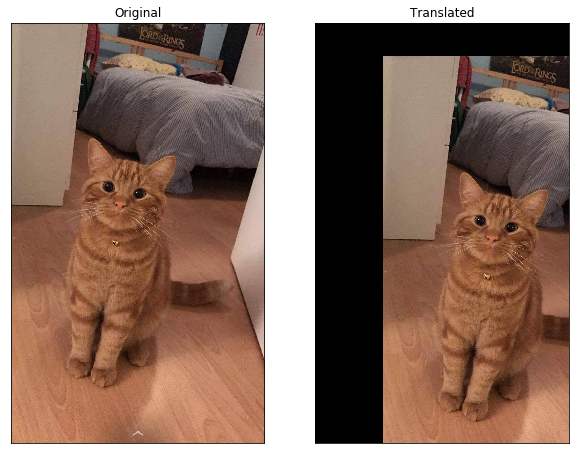

In [3]:
###############
# TRANSLATION #
###############
import cv2
import numpy as np
import matplotlib.pyplot as plt

# store image path
img_path = "/home/gary/Pictures/tiger.jpg"

# load image
img = cv2.imread(img_path)

# resize the image by specifying new image size
height, width = img.shape[0:2] # ignoring number of color channels

# translation matrix for shift of (200, 100)
tx, ty = 200, 100
M = np.float32([[1, 0, tx], [0, 1, ty]])
# also need to set the new size of the image
res = cv2.warpAffine(img, M, (width, height))

# convert images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res)
plt.title("Translated"), plt.xticks([]), plt.yticks([])
plt.show()

## 2) Scaling: cv2.warpAffine()
- $M = 
  \begin{bmatrix}
    s_{x} & 0 & 0 \\
    0 & s_{y} & 0
  \end{bmatrix}$
- $s_{x}$ specifies scale factor along x-axis
- $s_{y}$ specifies scale factor along y-axis

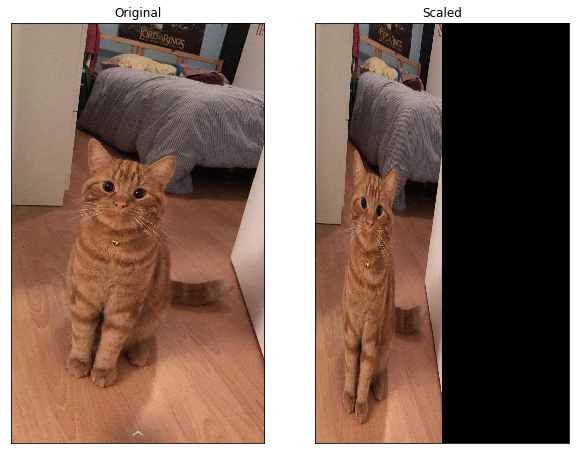

In [3]:
###########
# SCALING #
###########

# load image
img = cv2.imread(img_path)

# resize the image by specifying new image size
height, width = img.shape[0:2] # ignoring number of color channels

# scale matrix for scale (0.5, 1.5)
sx, sy = 0.5, 1.1
M = np.float32([[sx, 0, 0], [0, sy, 0]])
# also need to set the new size of the image
res = cv2.warpAffine(img, M, (width, height))

# convert images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res)
plt.title("Scaled"), plt.xticks([]), plt.yticks([])
plt.show()

## 2) Scaling: cv2.resize()

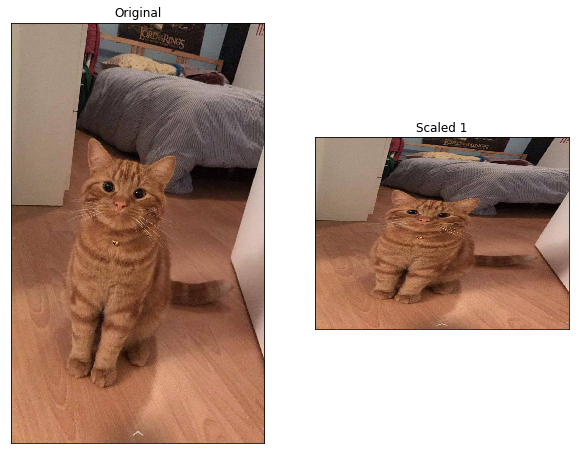

In [5]:
#############
# SCALING 2 #
#############

# load image
img = cv2.imread(img_path)

# resize the image by specifying new image size
height, width = img.shape[0:2] # ignoring number of color channels
# new width and height should be integers
height_new = int(height * 0.5)
width_new = int(width * 1.1)
# resize image
res1 = cv2.resize(img, (width_new, height_new), interpolation=cv2.INTER_CUBIC)

# convert images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res1)
plt.title("Scaled 1"), plt.xticks([]), plt.yticks([])
plt.show()

## Rotation: cv2.warpAffine()
- $M = 
  \begin{bmatrix}
    cos(\alpha) & sin(\alpha) & 0 \\
    -sin(\alpha) & cos(\alpha) & 0
  \end{bmatrix}$
- $\alpha$ specifies the angle of rotation in degrees (Counter-clockwise rotation).

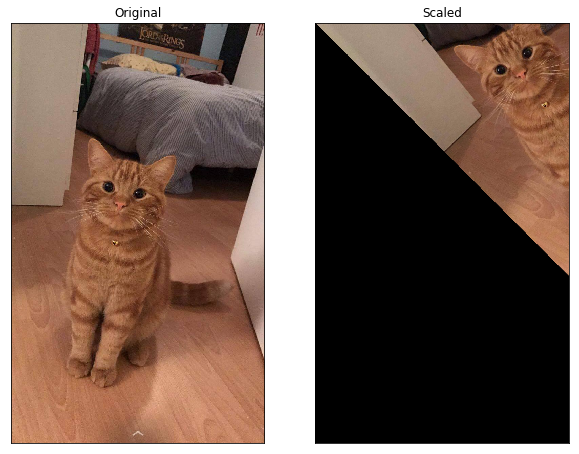

In [4]:
############
# ROTATION #
############
from math import sin, cos, radians

# load image
img = cv2.imread(img_path)

# resize the image by specifying new image size
height, width = img.shape[0:2] # ignoring number of color channels

# rotation matrix for angle = 45 (convert to radians)
alpha = 45
M = np.float32([[cos(radians(alpha)), sin(radians(alpha)), 0], 
                [-sin(radians(alpha)), cos(radians(alpha)), 0]])
# also need to set the new size of the image
res = cv2.warpAffine(img, M, (width, height))

# convert images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res)
plt.title("Scaled"), plt.xticks([]), plt.yticks([])
plt.show()

## Rotation: cv2.getRotationMatrix2D & cv2.warpAffine()
- $M = 
  \begin{bmatrix}
    \alpha & \beta & (1 - \alpha)(center_{x}) - \beta(center_{y}) \\
    -\beta & \alpha & \beta(center_{x}) + (1 - \alpha)(center_{y})
  \end{bmatrix}$
- $\alpha = scale \times cos(angle)$
- $\beta = scale \times sin(angle)$
    - center: center of rotation in the source image
    - angle: rotation angle in degrees. Positive values mean counter-clockwise rotation
    - scale: isotropic scale factor

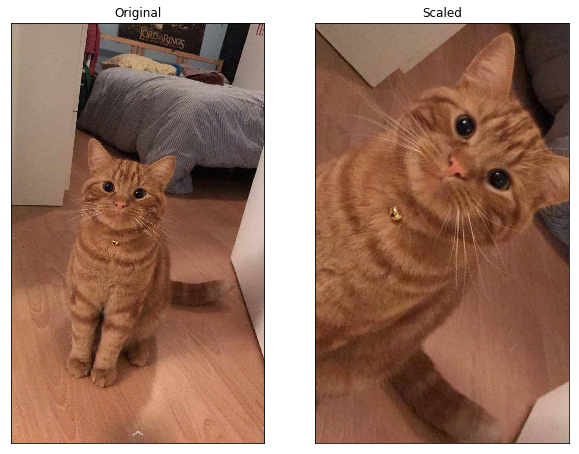

In [8]:
############
# ROTATION #
############

# load image
img = cv2.imread(img_path)
height, width = img.shape[0:2]

# compute the rotation matrix around the center pixel
# 45 degrees, unit scale
M = cv2.getRotationMatrix2D((width/2, height/2), -45, 2)
# also need to set the new size of the image
res = cv2.warpAffine(img, M, (width, height))

# convert images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res)
plt.title("Scaled"), plt.xticks([]), plt.yticks([])
plt.show()


## Shear: cv2.warpAffine()
- $M = 
  \begin{bmatrix}
    1 & sh_{x} & 0 \\
    sh_{y} & 1 & 0
  \end{bmatrix}$
- $sh_{x}$ specifies the shear factor along the x-axis
- $sh_{y}$ specifies the shear factor along the y-axis

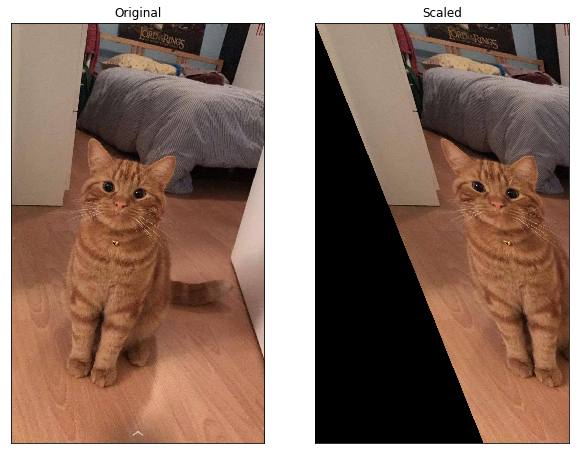

In [10]:
#########
# SHEAR #
#########

# load image
img = cv2.imread(img_path)
height, width = img.shape[0:2]

# shear matrix
shx, shy = 0.4, 0
M = np.float32([[1, shx, 0], 
                [shy, 1, 0]])
res = cv2.warpAffine(img, M, (width, height))

# convert images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res)
plt.title("Scaled"), plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients and Canny Edge Detection

## Image Gradients: cv2.Sobel()

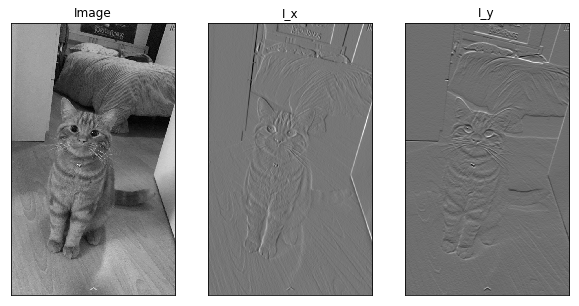

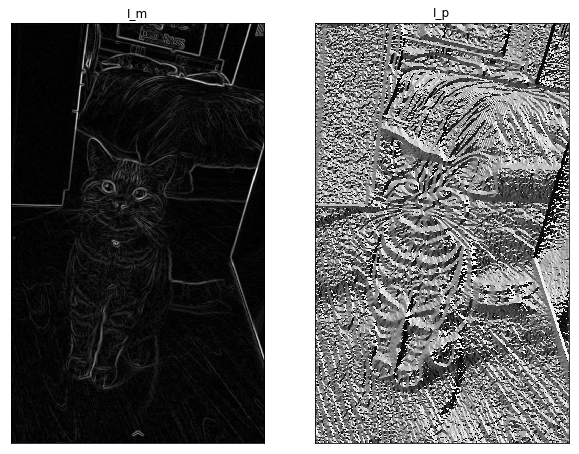

In [20]:
###################
# IMAGE GRADIENTS #
###################

# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=15)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=15)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_x, cmap="gray")
plt.title("I_x"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_y, cmap="gray")
plt.title("I_y"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(I_m, cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_p, cmap="gray")
plt.title("I_p"), plt.xticks([]), plt.yticks([])
plt.show()

## Image Gradients: cv2.Laplacian

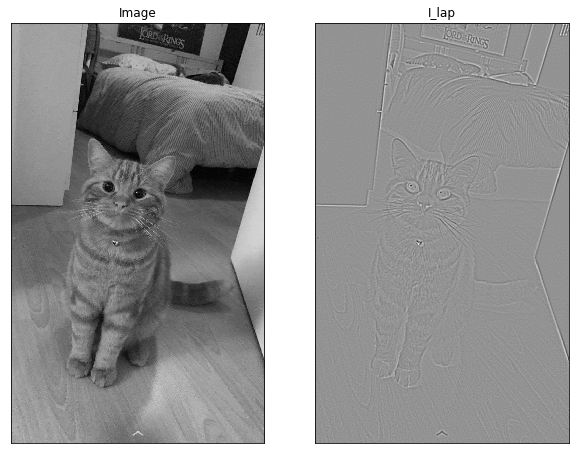

In [24]:
###################
# IMAGE GRADIENTS #
###################

# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 15x15 Laplacian filter to the intensity channel
I_lap = cv2.Laplacian(img, cv2.CV_64F, ksize=15)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_lap, cmap="gray")
plt.title("I_lap"), plt.xticks([]), plt.yticks([])
plt.show()

## Canny Edge Detection: cv2.Canny()

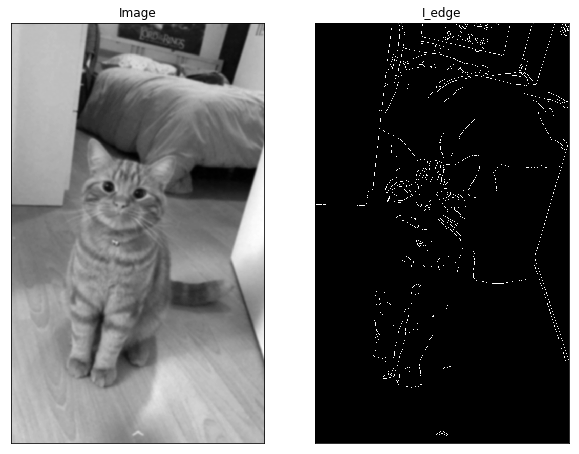

In [11]:
##################
# EDGE DETECTION #
##################

# load image as gray-scaled
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# blur image before-hand
img = cv2.GaussianBlur(img, (15, 15), 0)

# compute Canny edges
I_edge = cv2.Canny(img, 10, 50)
# I_edge = cv2.Canny(img, 50, 100)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_edge, cmap="gray")
plt.title("I_edge"), plt.xticks([]), plt.yticks([])
plt.show()